<a href="https://colab.research.google.com/github/dewirizki/UASKapsel_Stunting/blob/main/UAS_KapSel_UIN_2021_Kelompok_Stunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install unidecode twython tweepy beautifulsoup4 tika

In [2]:
pip install pyLDAvis

In [3]:
import warnings; warnings.simplefilter('ignore')
import nltk

!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py

!pip install spacy python-crfsuite unidecode textblob sastrawi
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm

nltk.download('popular')

--2021-12-13 20:40:45--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16713 (16K) [text/plain]
Saving to: ‘taudataNlpTm.py.2’

taudataNlpTm.py.2   100%[===================>]  16.32K  --.-KB/s    in 0s      

2021-12-13 20:40:45 (61.7 MB/s) - ‘taudataNlpTm.py.2’ saved [16713/16713]

mkdir: cannot create directory ‘data’: File exists
--2021-12-13 20:40:45--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

True

In [4]:
import warnings; warnings.simplefilter('ignore')
import taudataNlpTm as tau, itertools, re, pickle, pyLDAvis, pyLDAvis.sklearn, spacy, urllib.request
import time, numpy as np, matplotlib.pyplot as plt, networkx as nx, pandas as pd, seaborn as sns, taudata_sna as tauSNA
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tag import CRFTagger
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 99
'Done'

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python

'Done'

In [5]:
import taudataNlpTm as tau, seaborn as sns; sns.set()
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
Ck = 'N56DNKXGEnFc7njFcgSeQOOEc'
Cs = 'C4RHNQKs2o6AgzSO5NB3H1snRPZJss8qBYWWv51DKv4NjzgZLB'
At = '1307322137732984833-YRcHzOlfqsOXyCncmJVZLS7BpTFxkz'
As = 'MsRo3NJQpy2CCXrlF6qMpobCNo8SDwUnVUEFlO6cvdo4U'

In [7]:
def twitter_connect(Ck, Cs, At, As, verbose = 0):
    try:
        auth = tweepy.OAuthHandler(Ck, Cs)
        auth.set_access_token(At, As)
        twitter = tweepy.API(auth, wait_on_rate_limit=True)
        if verbose != 0:
            user = twitter.verify_credentials()
            print('Welcome "%s" you are now connected to twitter server' %user.name)
        return twitter
    except:
        print("Connection failed, please check your API keys or connection")
        return None

In [8]:
twitter = twitter_connect(Ck, Cs, At, As, verbose = 1)

Welcome "¹ᴰ☘️💚" you are now connected to twitter server


In [9]:
#topic = 'Gizi buruk since:2015-12-10'
#N = 100 # jumlah tweet yang ingin diambil
#bahasa = 'id'
#T = twitter.search(q=topic, lang=bahasa, count=N, tweet_mode = 'extended')
#tweets = [t._json for t in T]

In [10]:
#def getdata(topic, T):
#  while True:
#    try:
#      last_id = T[-1]._json['id'] - 1
#      T = twitter.search(q=topic, lang=bahasa, count=N, tweet_mode = 'extended', max_id=last_id)
#      tweets.extend([t._json for t in T])
#      print(' Berhasil mendapatkan {} tweets'.format(len(tweets)))
#    except IndexError:
#      return T

In [11]:
#getdata(topic, T)

In [12]:
#topic2='Stunting anak since:2015-12-10'

In [13]:
#getdata(topic2, T)

In [14]:
#topic3="Stunting dewasa since:2015-12-10"

In [15]:
#getdata(topic3, T)

In [16]:
#topic4='Upaya pemerintah stunting since:2015-12-10'

In [17]:
#getdata(topic4, T)

In [18]:
#topic5='edukasi stunting since:2015-12-10'

In [19]:
#getdata(topic5, T)

In [20]:
#topic6='faktor stunting since:2015-12-10'

In [21]:
#getdata(topic6, T)

In [22]:
#topic7='dampak stunting since:2015-12-10'

In [23]:
#getdata(topic7, T)

In [24]:
#topic8='literasi gizi since:2015-12-10'

In [25]:
#getdata(topic8, T)

In [26]:
#topic9='Kasus stunting since:2015-12-10'

In [27]:
#getdata(topic9, T)

In [28]:
#topic10 ='angka stunting since:2015-12-10'

In [29]:
#getdata(topic10, T)

In [30]:
#topic11 = 'Balita Stunting since:2015-12-10'

In [31]:
#getdata(topic11, T)

In [32]:
#topic12 = 'Stunting indonesia since:2015-12-10'

In [33]:
#getdata(topic12, T)

In [34]:
#topic13 = 'Stunting parenting since:2015-12-10'

In [35]:
#getdata(topic13, T)

In [36]:
#topic14 = 'Penyebab stunting since:2015-12-10'

In [37]:
#getdata(topic14, T)

In [38]:
#topic15 = 'Akibat stunting since:2015-12-10'

In [39]:
#getdata(topic15, T)

In [40]:
#topic16 = 'Resiko stunting since:2015-12-10'

In [41]:
#getdata(topic16, T)

In [42]:
#topic17 = 'pencegahan stunting since:2015-12-10'

In [43]:
#getdata(topic17, T)

In [44]:
#topic18 = 'malnutrisi balita since:2015-12-10'

In [45]:
#getdata(topic18, T)

In [46]:
#topic19 = 'gagal tumbuh since:2015-12-10'

In [47]:
#getdata(topic19, T)

In [48]:
#topic20 = 'angka kasus stunting since:2015-12-10'

In [49]:
#getdata(topic20, T)

In [50]:
#topic21 = 'stunting remaja since:2015-12-10'

In [51]:
#getdata(topic21, T)

In [52]:
#topic22 = 'stunting anemia since:2015-12-10'

In [53]:
#getdata(topic22, T)

In [54]:
#topic23 = 'urutan stunting since:2015-12-10'

In [55]:
#getdata(topic23, T)

In [56]:
#topic24 = 'Tim percepatan pencegahan anak kerdil since:2015-12-10'

In [57]:
#getdata(topic24, T)

In [58]:
#topic25 = 'Pandemi stunting'

In [59]:
#getdata(topic25, T)

In [60]:
#topic26 = 'Prevalensi stunting'

In [61]:
#getdata(topic26, T)

In [62]:
#topic27 = 'masalah kurang gizi since:2015-12-10'

In [63]:
#getdata(topic27, T)

In [64]:
#topic28 = 'stunting miskin since:2015-12-10'

In [65]:
#getdata(topic28, T)

In [66]:
#topic29 = '#lawanstunting'

In [67]:
#getdata(topic29, T)

In [68]:
#topic30 = 'stunting rokok'

In [69]:
#getdata(topic30, T)

In [70]:
#topic31 = 'tuntaskan stunting since:2015-12-10'

In [71]:
#getdata(topic31, T)

In [72]:
#topic32 = '#cegahstunting since:2015-12-10'

In [73]:
#getdata(topic32, T)

In [74]:
#topic33 = 'stunting asi since:2015-12-10'

In [75]:
#getdata(topic33, T)

In [76]:
#topic34 = 'stunting ekonomi since:2015-12-10'

In [77]:
#getdata(topic34, T)

In [78]:
#topic35 = 'bayi stunting since:2015-12-10'

In [79]:
#getdata(topic35, T)

In [80]:
#topic37 = 'kemenkes stunting since:2015-12-10'

In [81]:
#getdata(topic37, T)

In [82]:
#topic36 = 'kenaikan stunting since:2015-12-10'

In [83]:
#getdata(topic36, T)

In [84]:
#topic38 = 'penurunan stunting since:2015-12-10'

In [85]:
#getdata(topic38, T)

In [86]:
#topic39 = 'malnutrisi stunting since:2015-12-10'

In [87]:
#getdata(topic39, T)

In [88]:
#topic40 = 'malnutrisi indonesia since:2015-12-10'

In [89]:
#getdata(topic40, T)

In [90]:
#topic41 = 'kelaparan stunting since:2015-12-10'

In [91]:
#getdata(topic41, T)

In [92]:
#topic42 = 'desa stunting since:2015-12-10'

In [93]:
#getdata(topic42, T)

In [94]:
#topic43 = 'nikah stunting since:2015-12-10'

In [95]:
#getdata(topic43, T)

In [96]:
#topic44 = 'balita kekurangan gizi since:2015-12-10'

In [97]:
#getdata(topic44, T)

In [98]:
#topic45 = 'bayi kekurangan gizi since:2015-12-10'

In [99]:
#getdata(topic45, T)

In [100]:
#topic46 = 'penanggulangan stunting since:2015-12-10'

In [101]:
#getdata(topic46, T)

In [102]:
#topic47 = 'hari gizi stunting since:2015-12-10'

In [103]:
#getdata(topic47, T)

In [104]:
#topic48 = 'tangani stunting since:2015-12-10'

In [105]:
#getdata(topic48, T)

In [106]:
#topic49 = 'bahaya stunting since:2015-12-10'

In [107]:
#getdata(topic49, T)

In [108]:
#topic50 = 'asupan gizi anak since:2015-12-10'

In [109]:
#getdata(topic50, T)

In [110]:
#topic51 = 'asupan gizi bayi since:2015-12-10'

In [111]:
#getdata(topic51, T)

In [112]:
#topic52 = 'asupan gizi balita since:2015-12-10'

In [113]:
#getdata(topic52, T)

In [114]:
#topic53 = 'stunting negara berkembang since:2015-12-10'

In [115]:
#getdata(topic53, T)

In [116]:
#topic54 = 'masa depan stunting since:2015-12-10'

In [117]:
#getdata(topic54, T)

In [118]:
#topic55 = 'tanda stunting anak since:2015-12-10'

In [119]:
#getdata(topic55, T)

In [120]:
#topic56 = 'strategi stunting since:2015-12-10'

In [121]:
#getdata(topic56, T)

In [122]:
#topic57 = 'who stunting anak since:2015-12-10'

In [123]:
#getdata(topic57, T)

In [124]:
#topic58 = 'covid angka stunting'

In [125]:
#getdata(topic58, T)

In [126]:
#topic59 = 'ancaman stunting since:2015-12-10'

In [127]:
#getdata(topic59, T)

In [128]:
#topic60 = 'status gizi anak since:2015-12-10'

In [129]:
#getdata(topic60, T)

In [130]:
#topic61 = 'status gizi balita since:2015-12-10'

In [131]:
#getdata(topic61, T)

In [132]:
#topic62 = 'status gizi bayi since:2015-12-10'

In [133]:
#getdata(topic62, T)

In [134]:
#topic63 = 'masalah stunting since:2015-12-10'

In [135]:
#getdata(topic63, T)

In [136]:
#topic64 = 'isu stunting since:2015-12-10'

In [137]:
#getdata(topic64, T)

In [138]:
#topic65 = 'lawan stunting since:2015-12-10'

In [139]:
#getdata(topic65, T)

In [140]:
#topic66 = 'parenting stunting anak since:2015-12-10'

In [141]:
#getdata(topic66, T)

In [142]:
#topic67 = 'kebutuhan gizi anak since:2015-12-10'

In [143]:
#getdata(topic67, T)

In [144]:
#topic68 = 'kebutuhan gizi balita since:2015-12-10'

In [145]:
#getdata(topic68, T)

In [146]:
#topic69 = 'makanan stunting since:2015-12-10'

In [147]:
#getdata(topic69, T)

In [148]:
#topic70 = 'gizi buruk indonesia since:2015-12-10'

In [149]:
#getdata(topic70, T)

In [150]:
#topic71 = 'masalah gizi anak since:2015-12-10'

In [151]:
#getdata(topic71, T)

In [152]:
#topic72 = 'penangan stunting since:2015-12-10'

In [153]:
#getdata(topic72, T)

In [154]:
#def saveTweets(tweets, file='Tweets.json', orients='record'): #in Json Format
#    with open(file, 'w') as f:
#        for t in tweets:
#            try:
#                f.write(json.dumps(t)+'\n')
#            except:
#                pass

In [155]:
#fileName = 'data/stunting.json'
#saveTweets(tweets, file=fileName)
#print('Saved to '+fileName)

# EDA

In [156]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [157]:
!wget -P dataset/ https://raw.githubusercontent.com/dewirizki/UASKapsel_Stunting/main/data/stunting.json

--2021-12-13 20:41:27--  https://raw.githubusercontent.com/dewirizki/UASKapsel_Stunting/main/data/stunting.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22030363 (21M) [text/plain]
Saving to: ‘dataset/stunting.json.1’

stunting.json.1     100%[===================>]  21.01M  81.8MB/s    in 0.3s    

2021-12-13 20:41:27 (81.8 MB/s) - ‘dataset/stunting.json.1’ saved [22030363/22030363]



In [158]:
#pip install pandas --upgrade

## Pada proses read data pertama kali akan terjadi `import_optional_dependency() got an unexpected keyword argument 'errors'` yang disebabkan oleh perbedaan dependensi pandas dalam requirements saat menginstall pyLDAvis maka perlu melakukan restart runtime and run all

In [159]:
data = pd.read_json('/content/dataset/stunting.json', lines=True)

In [160]:
data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-12-10 13:06:03+00:00,1469292328577687553,1469292328577687552,@DeeRose78248851 @asepnakatepemah @AANG_BEY @b...,False,"[202, 227]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469292e+18,1.469292e+18,1.393180e+18,1.393180e+18,DeeRose78248851,"{'id': 1393554076474904578, 'id_str': '1393554...",NaN,NaN,None,NaN,False,0,4,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-10 11:25:26+00:00,1469267007463821314,1469267007463821312,Cuman pngn blng kalo udh kerja gua harus bener...,False,"[0, 149]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1139502660929724417, 'id_str': '1139502...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-10 09:49:08+00:00,1469242771684958208,1469242771684958208,RT @NurazizaShima: Serangan Saudi terhadap Yam...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1331862278120071169, 'id_str': '1331862...",NaN,NaN,None,NaN,False,6,0,False,False,in,{'created_at': 'Fri Dec 10 05:14:15 +0000 2021...,NaN,NaN,NaN,NaN,NaN
3,2021-12-10 07:46:09+00:00,1469211823312277509,1469211823312277504,RT @NurazizaShima: Anak-anak Yaman menjadi kor...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 1341385911632838656, 'id_str': '1341385...",NaN,NaN,None,NaN,False,3,0,False,False,in,{'created_at': 'Fri Dec 10 05:55:15 +0000 2021...,NaN,NaN,NaN,NaN,NaN
4,2021-12-10 07:28:39+00:00,1469207417644740608,1469207417644740608,"Berkesempatan memberikan sambutan, Panewu mend...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469207e+18,1.469207e+18,1.276198e+18,1.276198e+18,kecpiyungan1,"{'id': 1276198351856263170, 'id_str': '1276198...",NaN,NaN,None,NaN,False,0,1,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,2021-12-05 05:19:05+00:00,1467362872049078275,1467362872049078272,"[[ INIZIATIF ]]\n\nHallo, Nutrifolks!!! \n\nSt...",False,"[0, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1306766886, 'id_str': '1306766886', 'na...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,"{'media': [{'id': 1467362865766014976, 'id_str...",0.0,NaN,NaN,NaN
3046,2021-12-03 12:49:44+00:00,1466751507445927936,1466751507445927936,RT @ForumAnakID: 🥛[MY BREAKFAST CHALLENGE] 🥪\n...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 79084956, 'id_str': '79084956', 'name':...",NaN,NaN,None,NaN,False,1,0,False,False,in,{'created_at': 'Fri Dec 03 12:37:48 +0000 2021...,NaN,NaN,NaN,NaN,NaN
3047,2021-12-03 12:37:48+00:00,1466748501501485058,1466748501501485056,🥛[MY BREAKFAST CHALLENGE] 🥪\n\nHalo Sobat Foru...,False,"[0, 170]","{

In [161]:
data.keys()

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'retweeted_status',
       'extended_entities', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [162]:
data.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,3.050000e+03,3.050000e+03,2.230000e+02,2.230000e+02,2.270000e+02,2.270000e+02,0.0,0.0,0.0,3050.000000,3050.000000,1056.000000,1.210000e+02,1.210000e+02
mean,1.467231e+18,1.467231e+18,1.467352e+18,1.467352e+18,6.017626e+17,6.017626e+17,NaN,NaN,NaN,56.062951,1.997049,0.043561,1.461025e+18,1.461025e+18
std,5.495143e+14,5.495143e+14,7.291390e+14,7.291390e+14,6.219757e+17,6.219757e+17,NaN,NaN,NaN,97.859837,24.954961,0.204212,4.841890e+16,4.841890e+16
min,1.466162e+18,1.466162e+18,1.465967e+18,1.465967e+18,2.697030e+07,2.697030e+07,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.089126e+18,1.089126e+18
25%,1.466954e+18,1.466954e+18,1.466777e+18,1.466777e+18,4.331473e+08,4.331473e+08,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.466717e+18,1.466717e+18
50%,1.467069e+18,1.467069e+18,1.467334e+18,1.467334e+18,4.780649e+09,4.780649e+09,NaN,NaN,NaN,32.000000,0.000000,0.000000,1.467430e+18,1.467430e+18
75%,1.467791e+18,1.467791e+18,1.467790e+18,1.467790e+18,1.266504e+18,1.266504e+18,NaN,NaN,NaN,65.000000,0.000000,0.000000,1.467778e+18,1.467778e+18
max,1.469292e+18,1.469292e+18,1.469292e+18,1.469292e+18,1.464956e+18,1.464956e+18,NaN,NaN,NaN,3606.000000,657.000000,1.000000,1.469078e+18,1.469078e+18


In [163]:
print('Ukuran data: {}' .format(data.shape))

Ukuran data: (3050, 31)


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 3050 non-null   datetime64[ns, UTC]
 1   id                         3050 non-null   int64              
 2   id_str                     3050 non-null   int64              
 3   full_text                  3050 non-null   object             
 4   truncated                  3050 non-null   bool               
 5   display_text_range         3050 non-null   object             
 6   entities                   3050 non-null   object             
 7   metadata                   3050 non-null   object             
 8   source                     3050 non-null   object             
 9   in_reply_to_status_id      223 non-null    float64            
 10  in_reply_to_status_id_str  223 non-null    float64            
 11  in_r

In [165]:
data = data.rename(columns={"full_text": "tweet"})

In [166]:
data.keys()

Index(['created_at', 'id', 'id_str', 'tweet', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'retweeted_status',
       'extended_entities', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [167]:
data['tweet'].head()

0    @DeeRose78248851 @asepnakatepemah @AANG_BEY @b...
1    Cuman pngn blng kalo udh kerja gua harus bener...
2    RT @NurazizaShima: Serangan Saudi terhadap Yam...
3    RT @NurazizaShima: Anak-anak Yaman menjadi kor...
4    Berkesempatan memberikan sambutan, Panewu mend...
Name: tweet, dtype: object

In [168]:
#Memeriksa Duplikasi pada Data
print(data.shape)
data.duplicated(subset=['tweet']).sum()

(3050, 31)


2458

In [169]:
#Menghilangkan Duplikasi pada Data
df = data.drop_duplicates(subset=['tweet'])
print(df.shape)

(592, 31)


In [170]:
df

,created_at,id,id_str,tweet,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-12-10 13:06:03+00:00,1469292328577687553,1469292328577687552,@DeeRose78248851 @asepnakatepemah @AANG_BEY @b...,False,"[202, 227]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469292e+18,1.469292e+18,1.393180e+18,1.393180e+18,DeeRose78248851,"{'id': 1393554076474904578, 'id_str': '1393554...",NaN,NaN,None,NaN,False,0,4,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-10 11:25:26+00:00,1469267007463821314,1469267007463821312,Cuman pngn blng kalo udh kerja gua harus bener...,False,"[0, 149]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1139502660929724417, 'id_str': '1139502...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-10 09:49:08+00:00,1469242771684958208,1469242771684958208,RT @NurazizaShima: Serangan Saudi terhadap Yam...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1331862278120071169, 'id_str': '1331862...",NaN,NaN,None,NaN,False,6,0,False,False,in,{'created_at': 'Fri Dec 10 05:14:15 +0000 2021...,NaN,NaN,NaN,NaN,NaN
3,2021-12-10 07:46:09+00:00,1469211823312277509,1469211823312277504,RT @NurazizaShima: Anak-anak Yaman menjadi kor...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 1341385911632838656, 'id_str': '1341385...",NaN,NaN,None,NaN,False,3,0,False,False,in,{'created_at': 'Fri Dec 10 05:55:15 +0000 2021...,NaN,NaN,NaN,NaN,NaN
4,2021-12-10 07:28:39+00:00,1469207417644740608,1469207417644740608,"Berkesempatan memberikan sambutan, Panewu mend...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469207e+18,1.469207e+18,1.276198e+18,1.276198e+18,kecpiyungan1,"{'id': 1276198351856263170, 'id_str': '1276198...",NaN,NaN,None,NaN,False,0,1,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,2021-12-02 04:59:15+00:00,1466270714915278851,1466270714915278848,"@collegemenfess -c kesehatan dan gizi anak, bu...",False,"[16, 229]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.466270e+18,1.466270e+18,4.282384e+08,4.282384e+08,kisahrenjana,"{'id': 428238435, 'id_str': '428238435', 'name...",NaN,NaN,None,NaN,False,0,2,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
3017,2021-12-04 10:26:53+00:00,1467077944434737154,1467077944434737152,@marlonisve kebutuhan gizi balita dan efeknya ...,False,"[12, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.467077e+18,1.467077e+18,1.090419e+18,1.090419e+18,marlonisve,"{'id': 1251502530783109121, 'id_str': '1251502...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
3022,2021-12-04 15:22:21+00:00,1467152301274005507,1467152301274005504,"Dia itu kurus banget, pendek juga. Gak tau deh...",False,"[0, 253]","{'hashtags

In [171]:
df.keys()

Index(['created_at', 'id', 'id_str', 'tweet', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'retweeted_status',
       'extended_entities', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [172]:
print("Tweet dari User dengan Retweet Terbanyak")
d_ = df[df['retweet_count'] == df['retweet_count'].max()]
print(d_.iloc[0].tweet)
d_.head(1)

Tweet dari User dengan Retweet Terbanyak
RT @sdenta: Banyak testimoni para praktisi puasa di thread kemaren, dan banyak yg nanya emangnya bisa cukup nutrisinya kalo puasa terus? We…


,created_at,id,id_str,tweet,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
117,2021-12-06 15:44:38+00:00,1467882684210769924,1467882684210769920,RT @sdenta: Banyak testimoni para praktisi pua...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1236103396647567360, 'id_str': '1236103...",NaN,NaN,None,NaN,False,3606,0,False,False,in,{'created_at': 'Tue Feb 09 03:07:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN


In [173]:
df.sort_values(by=['retweet_count'], ascending=False).head(5)

,created_at,id,id_str,tweet,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
117,2021-12-06 15:44:38+00:00,1467882684210769924,1467882684210769920,RT @sdenta: Banyak testimoni para praktisi pua...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1236103396647567360, 'id_str': '1236103...",NaN,NaN,None,NaN,False,3606,0,False,False,in,{'created_at': 'Tue Feb 09 03:07:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN
308,2021-12-06 09:36:41+00:00,1467790085768634375,1467790085768634368,Permasalahan stunting alias gagal tumbuh pada ...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 829366551446818816, 'id_str': '82936655...",NaN,NaN,None,NaN,False,219,657,False,False,in,NaN,"{'media': [{'id': 1467790077669429250, 'id_str...",0.0,NaN,NaN,NaN
184,2021-12-07 03:52:54+00:00,1468065958027677697,1468065958027677696,RT @asumsico: Permasalahan stunting alias gaga...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 814764697693999104, 'id_str': '81476469...",NaN,NaN,None,NaN,False,219,0,False,False,in,{'created_at': 'Mon Dec 06 09:36:41 +0000 2021...,"{'media': [{'id': 1467790077669429250, 'id_str...",0.0,NaN,NaN,NaN
678,2021-12-05 01:36:30+00:00,1467306857848999939,1467306857848999936,RT @Lima8Satu: Pemerintah tengah gencar-gencar...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1377809135312412673, 'id_str': '1377809...",NaN,NaN,None,NaN,False,72,0,False,False,in,{'created_at': 'Sat Dec 04 05:45:36 +0000 2021...,NaN,NaN,NaN,NaN,NaN
787,2021-12-04 05:45:36+00:00,1467007157576949764,1467007157576949760,Pemerintah tengah gencar-gencarnya menangani u...,False,"[0, 265]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1237012707481550848, 'id_str': '1237012...",NaN,NaN,None,NaN,False,72,95,False,False,in,NaN,"{'media': [{'id': 1467007116636348418, 'id_str...",0.0,NaN,NaN,NaN


In [174]:
print("Tweet dari User dengan Like Terbanyak")
d_2 = df[df['favorite_count'] == df['favorite_count'].max()]
print(d_2.iloc[0].tweet)
d_2.head(1)

Tweet dari User dengan Like Terbanyak
Permasalahan stunting alias gagal tumbuh pada anak masih menjadi masalah serius di Indonesia. https://t.co/LpmMdal3rT


,created_at,id,id_str,tweet,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
308,2021-12-06 09:36:41+00:00,1467790085768634375,1467790085768634368,Permasalahan stunting alias gagal tumbuh pada ...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 829366551446818816, 'id_str': '82936655...",NaN,NaN,None,NaN,False,219,657,False,False,in,NaN,"{'media': [{'id': 1467790077669429250, 'id_str...",0.0,NaN,NaN,NaN


In [175]:
d_3 = df['in_reply_to_screen_name'].value_counts().head(10)
d_3 = pd.DataFrame(data=d_3)
d_3.reset_index(inplace=True)
d_3 = d_3.rename(columns = {'index':'Username', 'in_reply_to_screen_name':'Banyak Reply Tweet'})
d_3

fig = px.bar(d_3, x='Username', y='Banyak Reply Tweet', color='Username', title = '10 Akun Twitter yang Tweet nya Paling Banyak Direply', height=400)
fig.show()

In [176]:
df['in_reply_to_screen_name']

0       DeeRose78248851
1                  None
2                  None
3                  None
4          kecpiyungan1
             ...       
3013       kisahrenjana
3017         marlonisve
3022       sekarmiira_h
3027         bpspklkota
3030               None
Name: in_reply_to_screen_name, Length: 592, dtype: object

In [177]:
df[df['in_reply_to_screen_name'] == 'txtdrorangsusah']

,created_at,id,id_str,tweet,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
26,2021-12-09 13:05:59+00:00,1468929921959428097,1468929921959428096,@txtdrorangsusah yang kaya gini pemerintah har...,False,"[17, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.468515e+18,1.468515e+18,1.278532e+18,1.278532e+18,txtdrorangsusah,"{'id': 1256613545351041025, 'id_str': '1256613...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
35,2021-12-09 05:09:24+00:00,1468809985287094273,1468809985287094272,@txtdrorangsusah Anjir gizi buruk,False,"[17, 33]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.468515e+18,1.468515e+18,1.278532e+18,1.278532e+18,txtdrorangsusah,"{'id': 2899898801, 'id_str': '2899898801', 'na...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
36,2021-12-09 04:55:41+00:00,1468806534536646658,1468806534536646656,"@txtdrorangsusah Stanting, gizi buruk ternyata...",False,"[17, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.468515e+18,1.468515e+18,1.278532e+18,1.278532e+18,txtdrorangsusah,"{'id': 1973573347, 'id_str': '1973573347', 'na...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
37,2021-12-09 02:30:43+00:00,1468770052463751170,1468770052463751168,@txtdrorangsusah iki ngono iwak e gizi buruk,False,"[17, 44]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.468515e+18,1.468515e+18,1.278532e+18,1.278532e+18,txtdrorangsusah,"{'id': 1455895608095506432, 'id_str': '1455895...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
39,2021-12-09 02:13:49+00:00,1468765800639053824,1468765800639053824,@txtdrorangsusah Kasian lelenya kena gizi buruk 😭,False,"[17, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.468515e+18,1.468515e+18,1.278532e+18,1.278532e+18,txtdrorangsusah,"{'id': 401361717, 'id_str': '401361717', 'name...",NaN,NaN,None,NaN,False,0,1,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
44,2021-12-08 17:17:17+00:00,1468630777243967488,1468630777243967488,@txtdrorangsusah Gizi buruk ikannya😭,False,"[17, 36]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.468515e+18,1.468515e+18,1.278532e+18,1.278532e+18,txtdrorangsusah,"{'id': 1295926875219324929, 'id_str': '1295926...",NaN,NaN,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocess Data

In [178]:
import warnings; warnings.simplefilter('ignore')
import re
from nltk.tokenize import TweetTokenizer; Tokenizer = TweetTokenizer(reduce_len=True)
from tqdm import tqdm#, trange
from textblob import TextBlob
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [179]:
D = df["tweet"].tolist()

In [180]:
D[0]

'@DeeRose78248851 @asepnakatepemah @AANG_BEY @bob_rahmat @BangDuyTea @dd9966 @Razzzz___81 @utunback @UdinSam78807473 @uu_sutari13 @evan_saepudin @DeniSoeprijadie @januar_malki @aniesygmanies @surasujaya Gizi buruk boled na tamah'

In [181]:
stops, lemmatizer = tau.LoadStopWords(lang='id')
stops.add('rt'); stops.add('..')
for i,d in tqdm(enumerate(D)):
    D[i] = tau.cleanText(d, lemma=lemmatizer, stops = stops, symbols_remove = True, min_charLen = 2)
    
print(D[0])

592it [00:00, 623.61it/s]

deerose78248851 asepnakatepemah aang_bey bob_rahmat bangduytea dd9966 razz__81 utunback udinsam78807473 uu_sutari13 evan_saepudin denisoeprijadie januar_malki aniesygmanies surasujaya gizi buruk boled na tamah


In [182]:
file = 'data/cleanedTweet_stunting.txt'
with open(file, 'w') as f:
    for d in D:
        f.write(d+'\n')
'Done'

'Done'

In [183]:
D

['deerose78248851 asepnakatepemah aang_bey bob_rahmat bangduytea dd9966 razz__81 utunback udinsam78807473 uu_sutari13 evan_saepudin denisoeprijadie januar_malki aniesygmanies surasujaya gizi buruk boled na tamah',
 'cuman pngn blng kalo udh kerja gua benerin gizi buruk gue si smpe sekurus sodara2 gue gemuk badannya terjamin enak makannya',
 'nurazizashima serangan saudi yaman menyebabkan krisis kemanusiaan terburuk dunia yaman anak menderita ko',
 'nurazizashima anak anak yaman korban utama serangan pasukan koalisi pimpinan arab saudi menteri kesehatan yaman mengumumkan',
 'berkesempatan sambutan panewu mendukung sosialisasi b2sa diharapkan sosialisasi memahamkan warga pangan bergizi makanan bergizi membantu menjaga imunitas mencegah gizi buruk stunting',
 'cobradental makanan sehat wortel ubi jalar jeruk membantu gizi buruk berdampak',
 'data unicef peperangan menyebabkan 300 anak tewas juta anak balita menderita gizi buruk membutuhkan perawatan stand up human rights',
 'anteng anteng

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

data = D.copy()
tf = tf_vectorizer.fit_transform(data)
tf_terms = tf_vectorizer.get_feature_names()


In [185]:
tf.shape

(592, 2908)

In [186]:
from spacy.lang.id import Indonesian
from nltk.tag import CRFTagger
nlp_id = Indonesian()  # Language Model
ct = CRFTagger()
ct.set_model_file('data/all_indo_man_tag_corpus_model.crf.tagger')

def NLPfilter(t, filters):
    tokens = nlp_id(t)
    tokens = [str(k) for k in tokens if len(k)>2]
    hasil = ct.tag_sents([tokens])
    return [k[0] for k in hasil[0] if k[1] in filters]

In [187]:
filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])

for i, d in tqdm(enumerate(D)):
    D[i] = NLPfilter(d,filters)

' '.join(D[1])

592it [00:00, 931.07it/s]


'cuman kerja benerin gizi buruk gemuk enak'

In [188]:
bigram_t = Phrases(D, min_count=2)
trigram_t = Phrases(bigram_t[D])
for idx, d in enumerate(D):
    for token in bigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            D[idx].append(token)
    for token in trigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            D[idx].append(token)
dictionary_t = Dictionary(D)
dictionary_t.filter_extremes(no_below=2, no_above=0.9)
#Create dictionary and corpus required for Topic Modeling
corpus_t = [dictionary_t.doc2bow(doc) for doc in D]
print('Number of unique tokens: %d' % len(dictionary_t))
print('Number of documents: %d' % len(corpus_t))
print(corpus_t[:1])

Number of unique tokens: 783
Number of documents: 592
[[(0, 1), (1, 1), (2, 3)]]


In [189]:
def compute_coherence_values(dictionary, corpus, texts, limit, coherence='c_v', start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [190]:
start, step, limit = 2, 1, 10 # Ganti dengan berapa banyak Topic yang ingin di hitung/explore
coh_t, kCV = [], 10 # hati-hati sangat LAMBAT karena cross validation pada metode yang memang tidak efisien (LDA)

print('iterasi ke: ', end = ' ')
for i in range(kCV):
    print(i+1, end = ', ', flush=True)
    model_list, c = compute_coherence_values(dictionary=dictionary_t, corpus=corpus_t, texts=D, start=start, limit=limit, step=step)
    coh_t.append(c)
    
coherence_t = np.mean(np.array(coh_t), axis=0)
'Done'

iterasi ke:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

'Done'

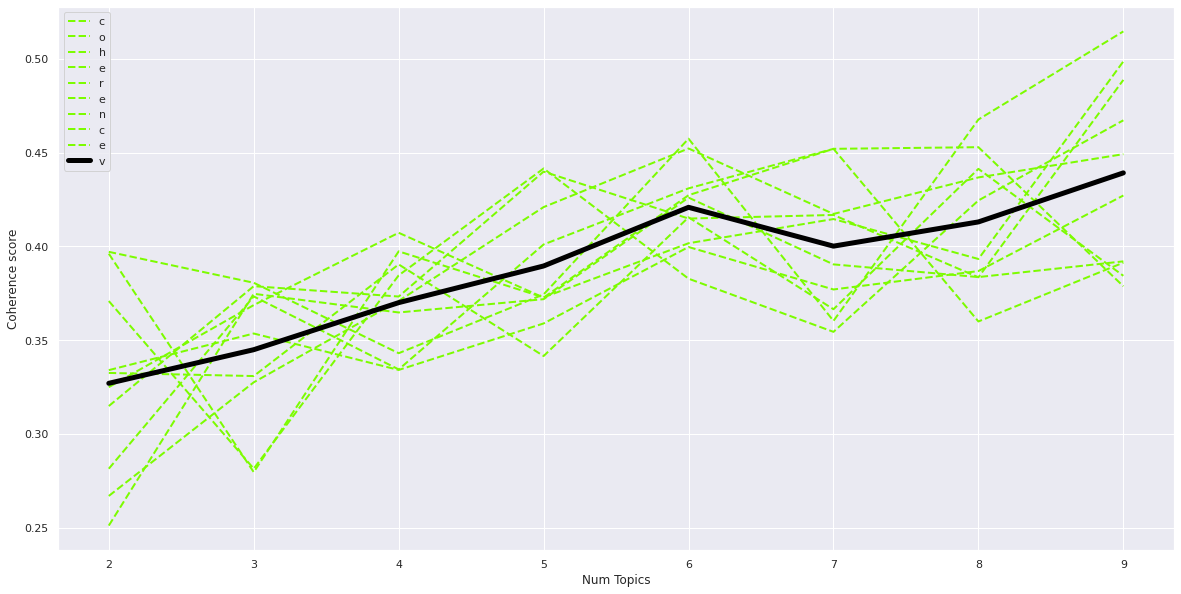

In [191]:
x = range(start, limit, step)
plt.figure(figsize=(20,10))
for c in coh_t:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_t, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [192]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 6
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(n_components=6, random_state=0)

In [193]:
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics

(592, 6)


array([[0.00794578, 0.00795621, 0.00794831, 0.0079411 , 0.96025897,
        0.00794964],
       [0.0076435 , 0.96193713, 0.0075929 , 0.00763676, 0.00759299,
        0.00759672],
       [0.01191374, 0.9402919 , 0.01191665, 0.0119204 , 0.01202606,
        0.01193126],
       ...,
       [0.00578091, 0.00578287, 0.97106272, 0.00579062, 0.00578582,
        0.00579706],
       [0.00835399, 0.95790718, 0.00849471, 0.00838948, 0.00836901,
        0.00848563],
       [0.01191779, 0.01191958, 0.01192774, 0.94031994, 0.01193848,
        0.01197646]])

In [194]:
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.151136  0.122476       1        1  39.650356
2      0.100941 -0.165736       2        1  18.966135
1     -0.062133  0.008799       3        1  14.243716
3     -0.028797  0.020189       4        1   9.332713
4     -0.071872  0.035699       5        1   8.922751
0     -0.089274 -0.021427       6        1   8.884330, topic_info=          Term        Freq       Total Category  logprob  loglift
1986   pandemi   30.000000   30.000000  Default  30.0000  30.0000
397      bkkbn   24.000000   24.000000  Default  29.0000  29.0000
885       gizi  228.000000  228.000000  Default  28.0000  28.0000
2240    prokes   21.000000   21.000000  Default  27.0000  27.0000
2293   redakan   21.000000   21.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2562  stunting    6.448386  337.373433   Topic6  -4.8684  -1.5365
452      buruk    4.605232  102.207342   Topic6  -5.2051  -0.6789
2881        ya    3.276398   27.552514   Topic6  -5.5455   0.2915
2367     sampe    2.771601   11.674892   Topic6  -5.7128   0.9829
2586     susah    2.757970   11.569152   Topic6  -5.7178   0.9870

[387 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.891342   00
0         3  0.074279   00
7         1  0.923230   06
14        6  0.487608  104
17        1  0.816291   12
...     ...       ...  ...
2892      3  0.110848   yg
2892      4  0.086215   yg
2892      5  0.086215   yg
2892      6  0.061582   yg
2905      5  0.739165  zay

[600 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 2, 4, 5, 1])

In [195]:
n_topics = 7
lda1 = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda1

LatentDirichletAllocation(n_components=7, random_state=0)

In [196]:
vsm_topics = lda1.transform(tf)
print(vsm_topics.shape)
vsm_topics

(592, 7)


array([[0.00680581, 0.00680709, 0.00680652, ..., 0.95916515, 0.0068072 ,
        0.00680484],
       [0.00651241, 0.00652057, 0.00650287, ..., 0.0065038 , 0.00650635,
        0.96095314],
       [0.01020667, 0.93874722, 0.01020883, ..., 0.010207  , 0.01021241,
        0.01020828],
       ...,
       [0.00494266, 0.00495213, 0.97034773, ..., 0.00493469, 0.00494607,
        0.00493685],
       [0.00714644, 0.95697487, 0.00720627, ..., 0.00714369, 0.00719677,
        0.00715039],
       [0.01020698, 0.01020912, 0.01022167, ..., 0.01020849, 0.01021963,
        0.01020899]])

In [197]:
pyLDAvis.sklearn.prepare(lda1, tf, tf_vectorizer) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.166343  0.103384       1        1  36.412856
2     -0.076601 -0.183141       2        1  16.882542
1      0.065233 -0.003990       3        1  13.310772
6      0.025226  0.026947       4        1  10.397509
3     -0.034740  0.014190       5        1   8.252496
0      0.115521  0.004258       6        1   8.041254
4      0.071702  0.038352       7        1   6.702571, topic_info=          Term        Freq       Total Category  logprob  loglift
1986   pandemi   30.000000   30.000000  Default  30.0000  30.0000
397      bkkbn   24.000000   24.000000  Default  29.0000  29.0000
2562  stunting  334.000000  334.000000  Default  28.0000  28.0000
885       gizi  230.000000  230.000000  Default  27.0000  27.0000
2240    prokes   21.000000   21.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2056    pemkot    1.353673    6.112382   Topic7  -6.1476   1.1952
1334       klo    1.353580    6.575883   Topic7  -6.1477   1.1220
2750        tp    1.353578   17.124096   Topic7  -6.1477   0.1649
546     dampak    1.353551    3.609022   Topic7  -6.1477   1.7220
247    bantuan    1.353534   10.191496   Topic7  -6.1477   0.6838

[435 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.884621   00
0         3  0.073718   00
7         1  0.917284   06
14        4  0.928685  104
15        7  0.502441   11
...     ...       ...  ...
2892      4  0.209638   yg
2892      5  0.024663   yg
2892      6  0.049327   yg
2892      7  0.061658   yg
2905      3  0.667872  zay

[717 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 2, 7, 4, 1, 5])

In [198]:
n_topics = 8
lda2 = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda2

LatentDirichletAllocation(n_components=8, random_state=0)

In [199]:
vsm_topics = lda2.transform(tf)
print(vsm_topics.shape)
vsm_topics

(592, 8)


array([[0.00595395, 0.00595438, 0.00595399, ..., 0.00595434, 0.00595358,
        0.00595584],
       [0.00568442, 0.00569426, 0.00568425, ..., 0.0056843 , 0.00568906,
        0.96019218],
       [0.00892997, 0.93747751, 0.00893456, ..., 0.00893271, 0.0089311 ,
        0.00893355],
       ...,
       [0.00431263, 0.00431386, 0.96980473, ..., 0.00431332, 0.00431542,
        0.00431527],
       [0.0062507 , 0.95620393, 0.00626539, ..., 0.00625925, 0.00625509,
        0.00626066],
       [0.00892913, 0.00893645, 0.00894306, ..., 0.00894299, 0.00893843,
        0.93744004]])

In [200]:
pyLDAvis.sklearn.prepare(lda2, tf, tf_vectorizer) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.146654  0.045382       1        1  26.070343
7     -0.137009 -0.100062       2        1  18.254718
2      0.108953 -0.165656       3        1  16.097000
6     -0.009120  0.103140       4        1  10.512924
1     -0.007736  0.018415       5        1   7.986442
4     -0.062285  0.046713       6        1   7.968334
3      0.032583  0.051876       7        1   7.555760
0     -0.072041  0.000192       8        1   5.554481, topic_info=          Term        Freq       Total Category  logprob  loglift
2562  stunting  330.000000  330.000000  Default  30.0000  30.0000
397      bkkbn   24.000000   24.000000  Default  29.0000  29.0000
1986   pandemi   31.000000   31.000000  Default  28.0000  28.0000
2768     tubuh   30.000000   30.000000  Default  27.0000  27.0000
2240    prokes   22.000000   22.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2586     susah    1.940860   11.813070   Topic8  -5.5994   1.0845
2357     salah    1.940980   17.014421   Topic8  -5.5994   0.7197
1409     kurus    1.872986   13.950140   Topic8  -5.6350   0.8826
2562  stunting    2.885336  330.666594   Topic8  -5.2029  -1.8509
2892        yg    1.993385   82.405530   Topic8  -5.5727  -0.8313

[485 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.078457   00
0         2  0.784571   00
0         5  0.078457   00
0         7  0.078457   00
3         2  0.790347   03
...     ...       ...  ...
2892      5  0.048540   yg
2892      6  0.060676   yg
2892      7  0.024270   yg
2892      8  0.024270   yg
2905      2  0.942287  zay

[810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 3, 7, 2, 5, 4, 1])